In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math

In [2]:
sample = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/G_with_binaries_with_parameters_3.csv')
# M DWARFS
rows = sample[(sample["sec_temp"] <= np.log10(4000))]
# M DWARFS AND K DWARFS
#rows = sample[(sample["sec_temp"] <= np.log10(5200))]
print('There are ' + str(len(rows['logTe'])) + ' G/M binaries in this sample.')
rows.to_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/final_sample_gm_binaries.csv', index=False) # Save to a new CSV file

There are 14482 G/M binaries in this sample.


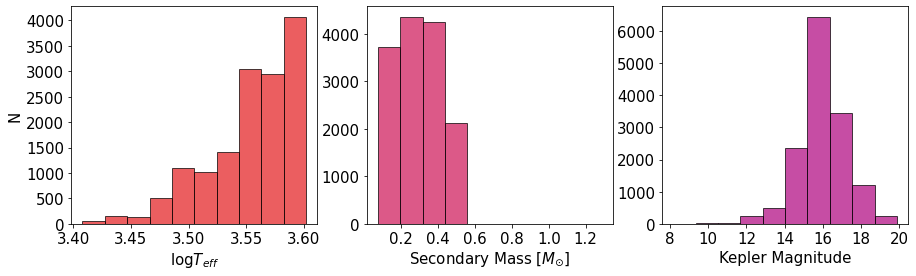

In [3]:
plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.hist(rows['sec_temp'], color='#e31a1c', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel(r'$\logT_{eff}$', fontsize=15)
plt.subplot(132)
plt.hist(rows['sec_mass'], color='#ce1256', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'Secondary Mass [$M_{\odot}$]', fontsize=15)
plt.subplot(133)
plt.hist(rows['sec_mags'], color='#ae017e', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Kepler Magnitude', fontsize=15)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_m_dwarf_parameters.png')
plt.show()

In [4]:
sample = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/final_sample_gm_binaries.csv')
rows = sample[(sample["logg"] >= 4.2)]
print('There are ' + str(len(rows['logTe'])) + ' G/M binaries in this sample with MS G dwarfs.')
rows.to_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/final_sample_gm_binaries_nogiants.csv') # Save to a new CSV file

There are 14165 G/M binaries in this sample with MS G dwarfs.


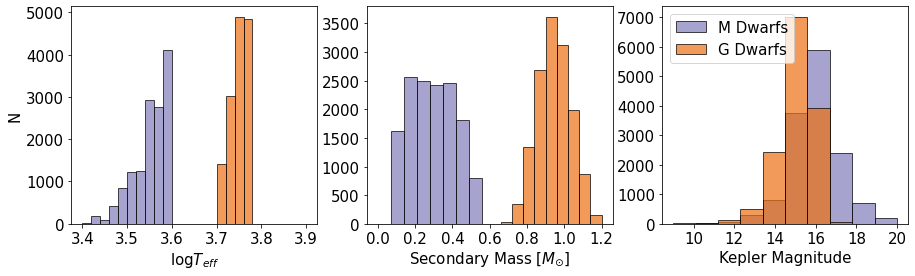

In [5]:
plt.figure(figsize=(15, 4))
plt.subplot(131)
plt.hist(rows['sec_temp'], bins=10, range=(3.4, 3.6), color='#807dba', alpha=0.7, edgecolor='black', linestyle='-')
plt.hist(rows['logTe'], bins=10, range=(3.7, 3.9), color='#ec7014', alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('N', fontsize=15)
plt.xlabel(r'$\logT_{eff}$', fontsize=15)
plt.subplot(132)
plt.hist(rows['sec_mass'], bins=10, range=(0.0, 0.7), color='#807dba', alpha=0.7, edgecolor='black', linestyle='-')
plt.hist(rows['Mact'], color='#ec7014', bins=10, range=(0.6, 1.2), alpha=0.7, edgecolor='black', linestyle='-')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(r'Secondary Mass [$M_{\odot}$]', fontsize=15)
plt.subplot(133)
plt.hist(rows['sec_mags'], bins=10, range=(9, 20), color='#807dba', alpha=0.7, edgecolor='black', linestyle='-', label='M Dwarfs')
plt.hist(rows['Kepler'], bins=10, range=(9,20), color='#ec7014', alpha=0.7, edgecolor='black', linestyle='-', label='G Dwarfs')
plt.xticks(fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Kepler Magnitude', fontsize=15)
plt.savefig('/Users/jess/sf_m_dwarfs/sf_plots/P_gm_dwarf_parameters.png')
plt.show()

In [11]:
abs_pri_mags = []
abs_sec_mags = []
dist = []
p_flux = []
flux_ratios = []
app_pri_mags_corrected = []
app_sec_mags_corrected = []

binaries = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/final_sample_gm_binaries_nogiants.csv')
trilegal = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_trilegal_data/final_trilegal_master.csv')

lum = binaries['logL'] 
av = binaries['Av']
dist_mod = binaries['m-M0']
sec_mass = binaries['sec_mass']
comp = binaries['M_H']
mag = binaries['Kepler']
sec_mag = binaries['sec_mags']

for i in range(len(binaries['logAge'])):
    
    abs_mag_prim = mag[i] + 5 - av[i] - (5 * (np.log10(dist_mod[i])))
    abs_pri_mags.append(abs_mag_prim)

    abs_mag_sec = sec_mag[i] + 5 - av[i] - (5 * (np.log10(dist_mod[i])))
    abs_sec_mags.append(abs_mag_sec)

    primary_luminosity = (10**lum[i]) * 3.9e33
    distance_to_primary = (10**((dist_mod[i] + 5 - av[i])/5)) * 3.086e18
    dist.append(distance_to_primary)

    primary_flux = primary_luminosity / (4 * math.pi * (distance_to_primary)**2)
    p_flux.append(primary_flux)

    app_mag_prim_corrected = dist_mod[i] + abs_mag_prim 
    app_pri_mags_corrected.append(app_mag_prim_corrected)

    app_mag_sec_corrected = dist_mod[i] + abs_mag_sec
    app_sec_mags_corrected.append(app_mag_sec_corrected)
    
    flux_rat = 100**((app_mag_prim_corrected - app_mag_sec_corrected)/5)
    flux_ratios.append(flux_rat)

In [12]:
print(len(abs_pri_mags))
print(len(abs_sec_mags))
plot_dist = np.array(dist)/3.086e18

14165
14165


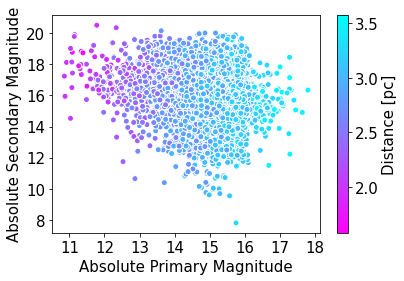

In [14]:
plt.scatter(abs_pri_mags, abs_sec_mags, c=np.log10(plot_dist), cmap='cool_r', edgecolor='white')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Absolute Secondary Magnitude', fontsize=15)
plt.xlabel('Absolute Primary Magnitude', fontsize=15)
cbar=plt.colorbar()
cbar.set_label('Distance [pc]', fontsize=15)
cbar.ax.tick_params(labelsize=15)
plt.savefig('/Users/Jess/sf_m_dwarfs/sf_plots/P_mags_and_dist.png')
plt.show()

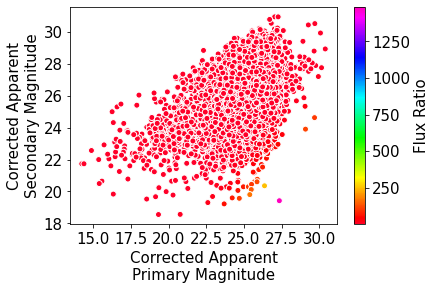

In [15]:
plot_dist = np.array(dist)/3.086e18
plt.scatter(app_pri_mags_corrected, app_sec_mags_corrected, c=flux_ratios, cmap='gist_rainbow', edgecolor='white')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Corrected Apparent\nSecondary Magnitude', fontsize=15)
plt.xlabel('Corrected Apparent\nPrimary Magnitude', fontsize=15)
cbar=plt.colorbar()
cbar.set_label('Flux Ratio', fontsize=15)
cbar.ax.tick_params(labelsize=15)
plt.savefig('/Users/Jess/sf_m_dwarfs/sf_plots/P_mags_and_flux.png')
plt.show()

In [16]:
full_sample_array = np.column_stack((binaries,abs_pri_mags,abs_sec_mags,dist,p_flux,flux_ratios,app_pri_mags_corrected,app_sec_mags_corrected))
np.savetxt('/Users/Jess/sf_m_dwarfs/sf_data_files/final_sample_gm_binaries_flux.csv', full_sample_array, delimiter=',', header='Index,Gc,logAge,M_H,m_ini,logL,logTe,logg,m-M0,Av,m2/m1,mbol,Kepler,g,r,i,z,DDO51_finf,J,H,K,Mact,periods,mass_ratios,sec_mass,sec_temp,sec_comp,sec_mags,abs_pri,abs_sec,dist,p_flux,fr,correct_pri_app,correct_sec_app')

In [17]:
sample = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/final_sample_gm_binaries_flux.csv')
rows = sample
rows.to_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/final_sample_gm_binaries_flux2.csv', index=True, index_label='number') # Save to a new CSV file

In [18]:
full_sample = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_trilegal_data/final_trilegal_master.csv')
print('There are ' + str(len(full_sample['logTe'])) + ' stars in the total sample.')
binaries = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/g_stars.csv')
print(str(len(binaries['logTe'])) + ' of these are G stars.')
g_stars = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/G_with_binaries.csv')
print(str(len(g_stars['logTe'])) + ' of these are binaries.')
g_m_binaries = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/final_sample_gm_binaries.csv')
print(str(len(g_m_binaries['logTe'])) + ' of these G primaries have an M companion.')
g_m_binaries_dwarfs = pd.read_csv('/Users/Jess/sf_m_dwarfs/sf_data_files/final_sample_gm_binaries_nogiants.csv')
print(str(len(g_m_binaries_dwarfs['logTe'])) + ' of these G primaries have an M companion and MS primaries.')

There are 194559 stars in the total sample.
73663 of these are G stars.
32422 of these are binaries.
14482 of these G primaries have an M companion.
14165 of these G primaries have an M companion and MS primaries.


In [19]:
complete_list = [str(len(trilegal['logTe'])) + ' & ' + str(len(full_sample['logTe'])) + ' & ' + str(len(binaries['logTe'])) + ' & ' + str(len(g_stars['logTe'])) + ' & ' + str(len(g_m_binaries['logTe'])) + ' & ' + str(len(g_m_binaries_dwarfs['logTe']))] #+ ' & ' + str(len(g_m_binaries_flux2['logTe']))]
np.savetxt('/Users/Jess/sf_m_dwarfs/sf_data_files/final_statistics.txt', complete_list, fmt='%s', delimiter='&', comments='', header='TRILEGAL & Total Sample & Binaries & G Type Primaries & G/M Binaries & No Giants & Low Flux Ratio')